In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

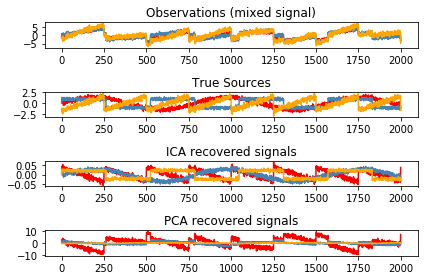

In [2]:
# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [70]:
from scipy.io import loadmat

import matplotlib.pyplot as plt

folder = '/home/pedrosergiot/Documents/dados_coletas/Com_Remocao_Artefato/5s'

exame = loadmat(folder + '/' + 'AnaClara3_05_2k_Pedro2' + '/exame_1.mat')

sinal = exame['dadosREJEICAO']

sinal.shape

(7168, 20)

In [73]:
exame.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jun 01 09:44:16 2017'), ('__version__', '1.0'), ('__globals__', []), ('ladoAT', array([[1]], dtype=uint8)), ('contaJanelaTOTAL', array([[7]], dtype=uint8)), ('dadosSinal', array([[ 1.16708347, -2.26322165, -2.21170688, ..., -0.34738154,
         0.28990005,  0.        ],
       [ 2.97081815, -0.85188997,  1.03808972, ...,  0.71611049,
         1.53145589,  0.        ],
       [ 4.5876407 ,  0.38537941,  3.84380542, ...,  1.63863913,
         2.64795955,  0.        ],
       ...,
       [ 4.31904992,  3.63329901,  2.16285412, ...,  1.7469711 ,
         3.52723481,  0.        ],
       [ 3.75614135,  3.36424208,  0.79009296, ...,  2.06508189,
         3.55547483,  0.        ],
       [ 3.38575976,  3.19336866, -0.82699234, ...,  2.58936943,
         3.68710564,  0.        ]])), ('in_at_esq', array([[ 0.        ,  0.        , -0.16333382, -0.23105628, -0.07746598,
         0.00350045]])), ('in_at_dir', ar

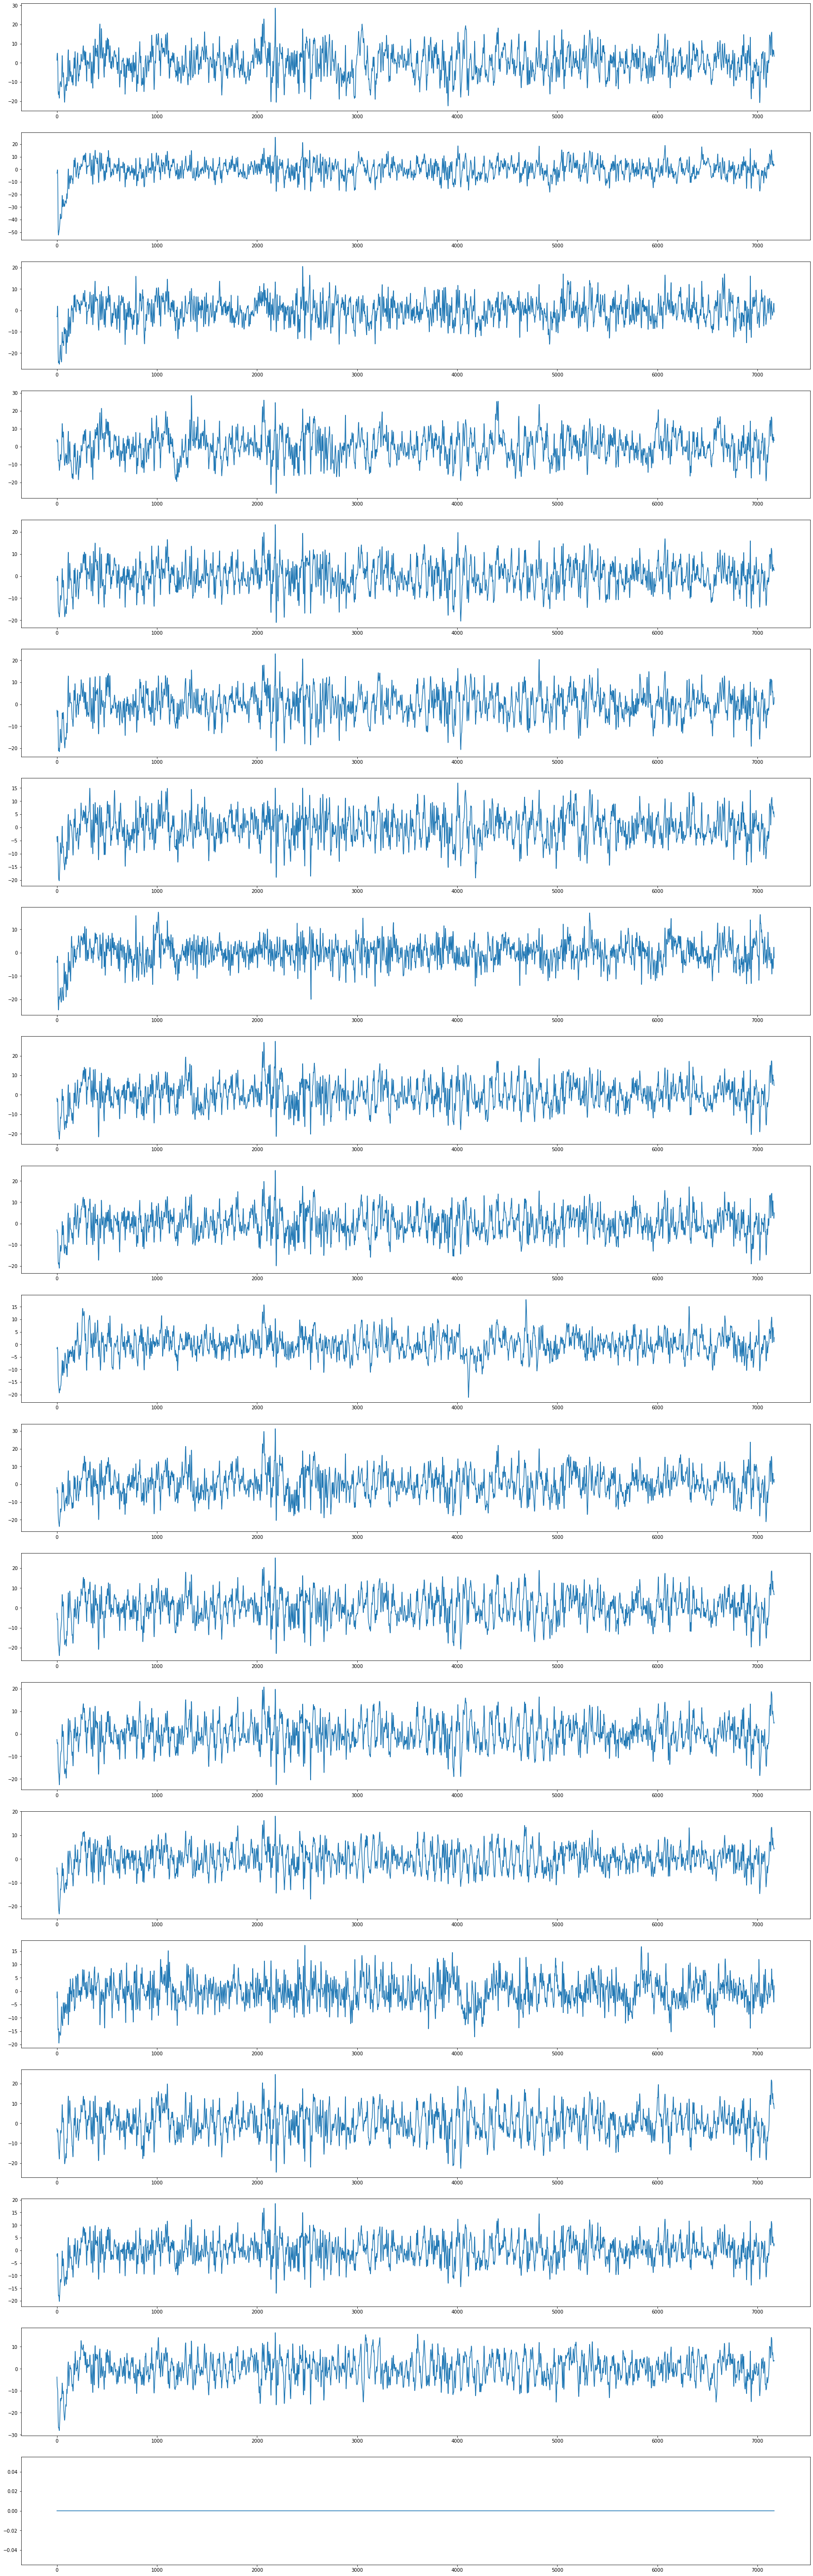

In [51]:
from matplotlib import gridspec

f, axs = plt.subplots(20,1,figsize=(30,100))

i = 0

for x in sinal.T:
    axs[i].plot(x)
    i+=1
    


In [71]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.decomposition import PCA
# Compute ICA

scaler = StandardScaler()
sinal = scaler.fit_transform(sinal)      # fits the scaler with the training data

#print(np.min(sinal))

pca = PCA(whiten=True)
sinal = pca.fit_transform(sinal)

ica = FastICA(whiten=False,max_iter=20000, tol=0.001)
S_ = ica.fit_transform(sinal)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

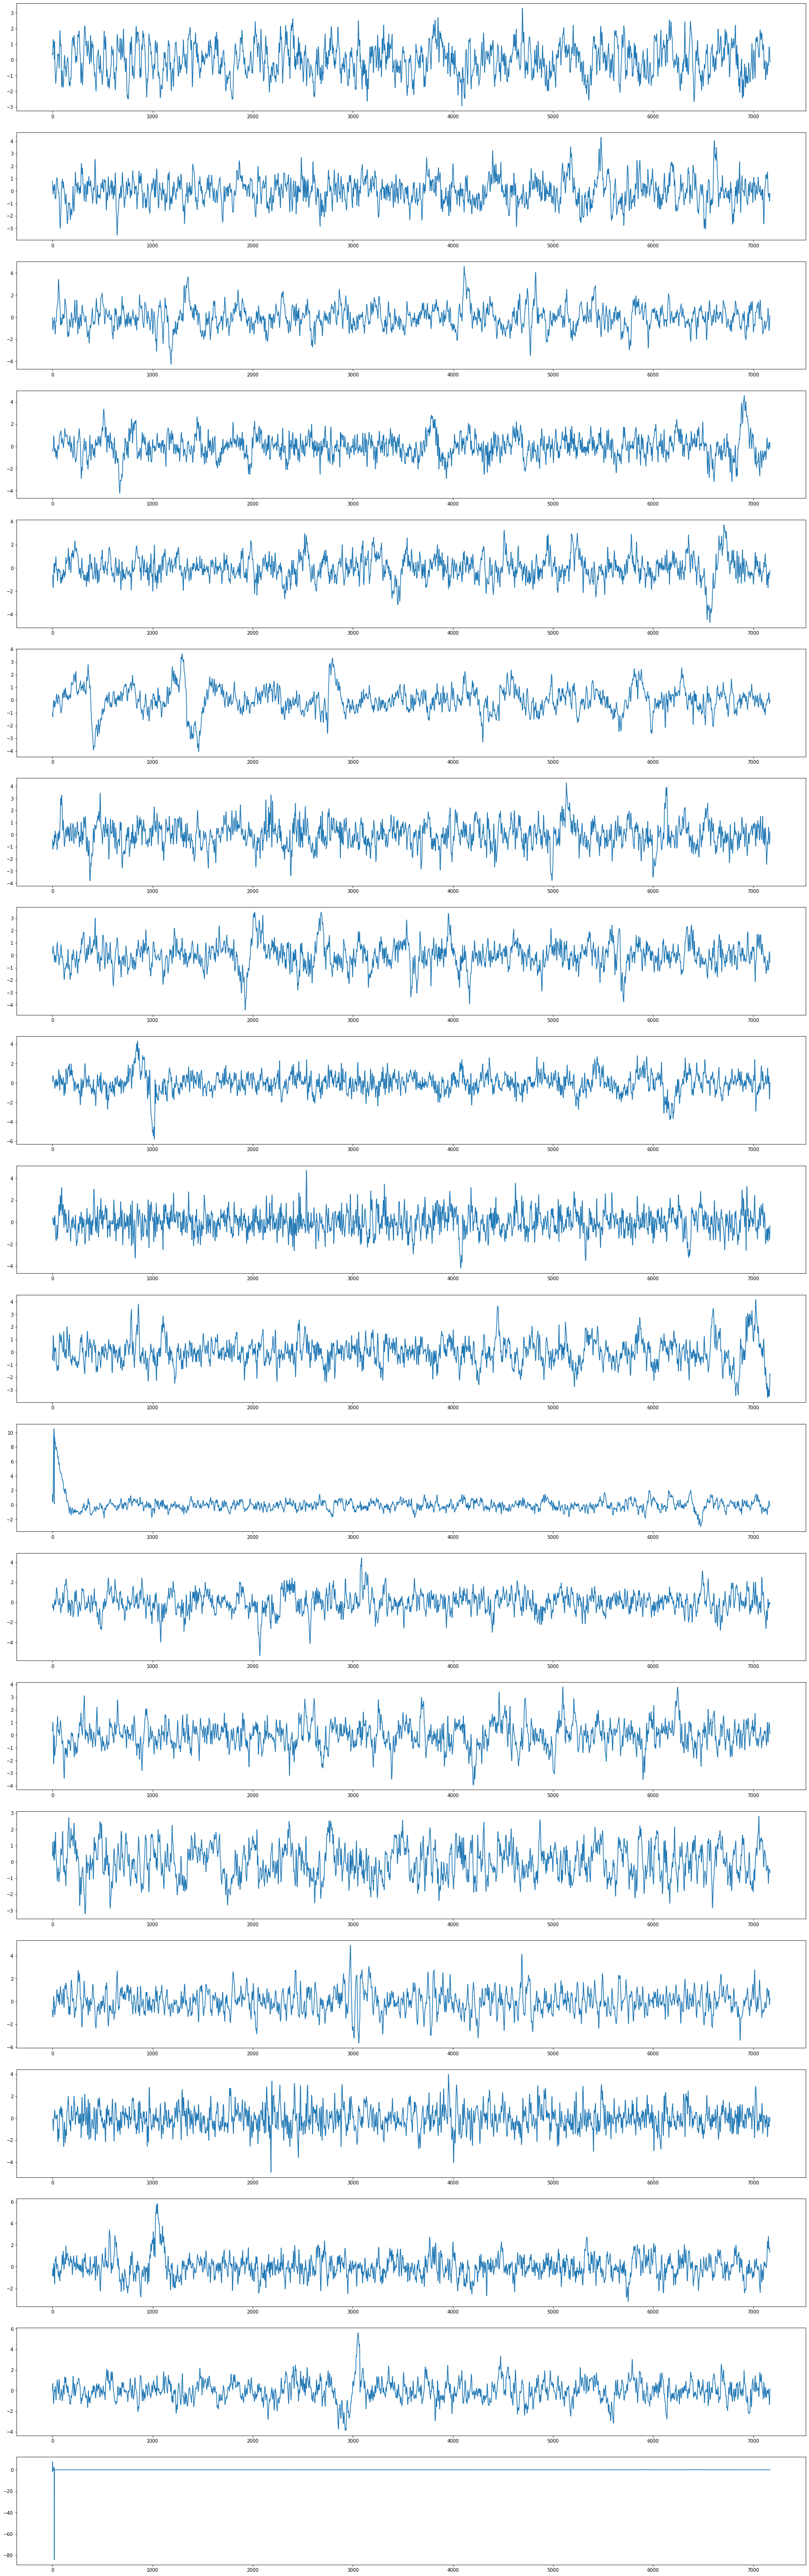

In [72]:
f, axs = plt.subplots(20,1,figsize=(30,100))

i = 0

for x in S_.T:
    axs[i].plot(x)
    i+=1

In [ ]:
reconstruido = ica.inverse_transform()